In [67]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score,roc_curve,auc

In [40]:
url = 'body.csv'
df =pd.read_csv(url)

In [41]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [43]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [44]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['target'] = label_encoder.fit_transform(df['class'])

In [45]:
X = df.drop(['target', 'class'],axis=1)
y = df['target']

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (10714, 11), Test : (2679, 11)


In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (8571, 11), Test : (2143, 11)


In [49]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [50]:
y_val

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [51]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

multi_classifier = Sequential()
multi_classifier.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

multi_classifier.add(Dense(16, activation='relu'))

multi_classifier.add(Dense(4, activation='softmax'))

In [52]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',verbose=1)
checkpoint = ModelCheckpoint('lab1_2_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]

In [53]:
multi_classifier.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [54]:
multi_classifier_history = multi_classifier.fit(X_train, y_train, batch_size=20,validation_data=(X_val,y_val),
                                                epochs=90,callbacks=callbacks_list)

Epoch 1/90
419/429 [============================>.] - ETA: 0s - loss: 1.0160 - accuracy: 0.5322
Epoch 1: val_accuracy improved from -inf to 0.61456, saving model to lab1_2_weights-01-0.615.hdf5
429/429 [==============================] - 3s 3ms/step - loss: 1.0120 - accuracy: 0.5353 - val_loss: 0.8434 - val_accuracy: 0.6146
Epoch 2/90
 71/429 [===>..........................] - ETA: 0s - loss: 0.8102 - accuracy: 0.6444

C:\Users\shevy\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


411/429 [===========================>..] - ETA: 0s - loss: 0.8159 - accuracy: 0.6393
Epoch 2: val_accuracy improved from 0.61456 to 0.65142, saving model to lab1_2_weights-02-0.651.hdf5
429/429 [==============================] - 1s 3ms/step - loss: 0.8140 - accuracy: 0.6401 - val_loss: 0.7844 - val_accuracy: 0.6514
Epoch 3/90
421/429 [============================>.] - ETA: 0s - loss: 0.7680 - accuracy: 0.6721
Epoch 3: val_accuracy improved from 0.65142 to 0.67522, saving model to lab1_2_weights-03-0.675.hdf5
429/429 [==============================] - 1s 3ms/step - loss: 0.7682 - accuracy: 0.6722 - val_loss: 0.7461 - val_accuracy: 0.6752
Epoch 4/90
420/429 [============================>.] - ETA: 0s - loss: 0.7380 - accuracy: 0.6955
Epoch 4: val_accuracy improved from 0.67522 to 0.68175, saving model to lab1_2_weights-04-0.682.hdf5
429/429 [==============================] - 1s 3ms/step - loss: 0.7380 - accuracy: 0.6953 - val_loss: 0.7296 - val_accuracy: 0.6818
Epoch 5/90
429/429 [=======

422/429 [============================>.] - ETA: 0s - loss: 0.5773 - accuracy: 0.7621
Epoch 29: val_accuracy did not improve from 0.73868
429/429 [==============================] - 1s 3ms/step - loss: 0.5779 - accuracy: 0.7616 - val_loss: 0.6159 - val_accuracy: 0.7382
Epoch 29: early stopping


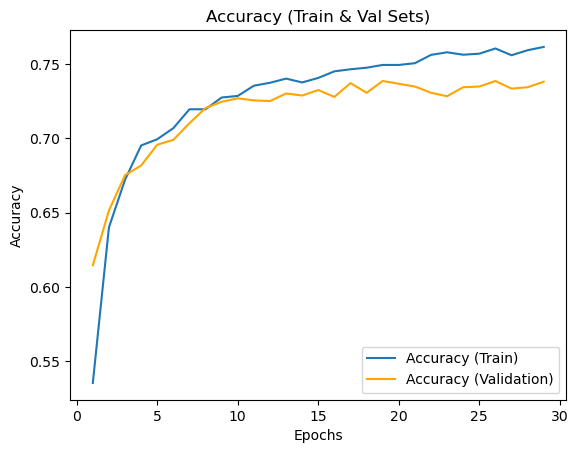

In [59]:
acc = multi_classifier_history.history['accuracy']
val_acc = multi_classifier_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
y_pred = multi_classifier.predict(X_test)

84/84 [==============================] - 0s 2ms/step


In [63]:
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

In [68]:
n_classes = y_test.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

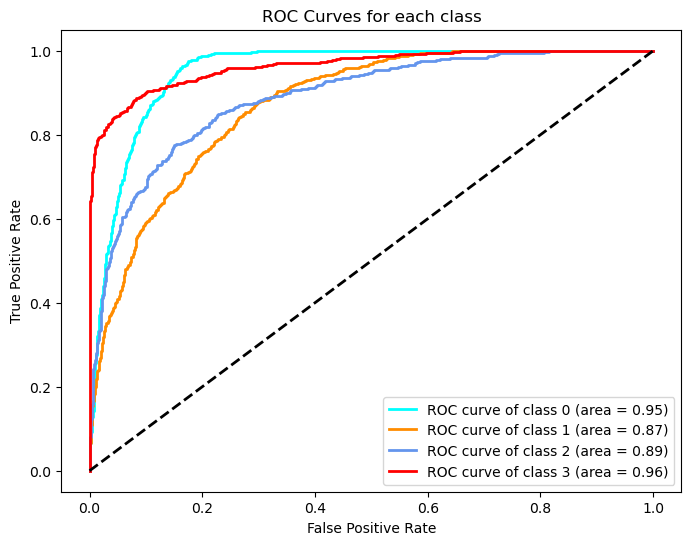

In [71]:
import itertools
plt.figure(figsize=(8, 6))
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each class')
plt.legend(loc="lower right")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       670
           1       0.60      0.66      0.63       669
           2       0.74      0.63      0.68       670
           3       0.93      0.80      0.86       670

    accuracy                           0.73      2679
   macro avg       0.75      0.73      0.74      2679
weighted avg       0.75      0.73      0.74      2679



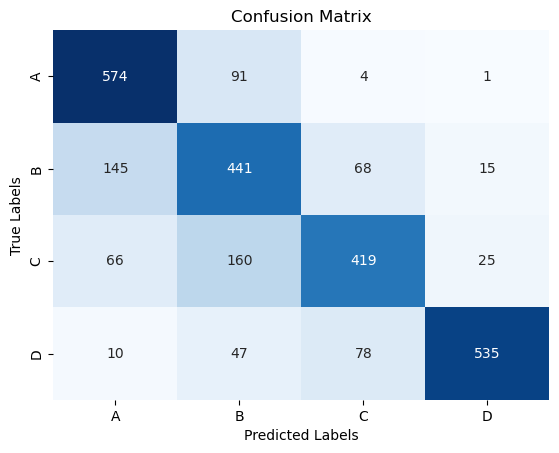

Weighted Accuracy: 0.7350
Recall (weighted): 0.7350
Precision (weighted): 0.7460


In [73]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

# Преобразуем предсказания в классы
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Рассчитаем метрики качества
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Выведем отчет по классификации
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Построим матрицу ошибок
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Выведем оценки
print(f'Weighted Accuracy: {accuracy:.4f}')
print(f'Recall (weighted): {recall:.4f}')
print(f'Precision (weighted): {precision:.4f}')
